# <div style="color:black; text-align:center"><i>Student Alcohol Consumption</i></div>
* Name: Abhiyank Goyal
* Panel : 3
* Roll No : PC-25
* ERP id : 1032170652

In [38]:
# importing the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import math
%matplotlib inline

In [40]:
# reading the dataset
df = pd.read_csv('student-mat.csv')

In [41]:
# displaying first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Dataset explaination

* <b>school</b> – student’s school (binary: ‘GP’ – Gabriel Pereira or ‘MS’ – Mousinho da Silveira)
* <b>sex</b> – student’s sex (binary: ‘F’ – female or ‘M’ – male)
* <b>age</b> – student’s age (numeric: from 15 to 22)
* <b>address</b> – student’s home address type (binary: ‘U’ – urban or ‘R’ – rural)
* <b>famsize</b> – family size (binary: ‘LE3’ – less or equal to 3 or ‘GT3’ – greater than 3)
* <b>Pstatus</b> – parent’s cohabitation status (binary: ‘T’ – living together or ‘A’ – apart)
* <b>Medu</b> – mother’s education (numeric: 0 – none, 1 – primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
* <b>Fedu</b> – father’s education (numeric: 0 – none, 1 – primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
* <b>Mjob</b> – mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
* <b>Fjob</b> – father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
* <b>reason</b> – reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)
* <b>guardian</b> – student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)
* <b>traveltime</b> – home to school travel time (numeric: 1 – <15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour, or 4 – >1 hour)
* <b>studytime</b> – weekly study time (numeric: 1 – <2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours, or 4 – >10 hours)
* <b>failures</b> – number of past class failures (numeric: n if 1<=n<3, else 4)
* <b>schoolsup</b> – extra educational support (binary: yes or no)
* <b>famsup</b> – family educational support (binary: yes or no)
* <b>paid</b> – extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* <b>activities</b> – extra-curricular activities (binary: yes or no)
* <b>nursery</b> – attended nursery school (binary: yes or no)
* <b>higher</b> – wants to take higher education (binary: yes or no)
* <b>internet</b> – Internet access at home (binary: yes or no)
* <b>romantic</b> – with a romantic relationship (binary: yes or no)
* <b>famrel</b> – quality of family relationships (numeric: from 1 – very bad to 5 – excellent)
* <b>freetime</b> – free time after school (numeric: from 1 – very low to 5 – very high)
* <b>goout</b> – going out with friends (numeric: from 1 – very low to 5 – very high)
* <b>Dalc</b> – workday alcohol consumption (numeric: from 1 – very low to 5 – very high)
* <b>Walc</b> – weekend alcohol consumption (numeric: from 1 – very low to 5 – very high)
* <b>health</b> – current health status (numeric: from 1 – very bad to 5 – very good)
* <b>absences</b> – number of school absences (numeric: from 0 to 93)
* The following grades are related with the course subject, Math or Portuguese:

* <b>G1</b> – first period grade (numeric: from 0 to 20)
* <b>G2</b> – second period grade (numeric: from 0 to 20)
* <b>G3</b> – final grade (numeric: from 0 to 20, output target)

In [42]:
# displaying columns in the dataset
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [44]:
# describing the datatset
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [32]:
# displaying no.of rows and columns 
math.shape

(395, 33)

In [33]:
math.isnull().any().sum()

0

In [48]:
# there is no missing data as can be seen above

df["reason"].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [49]:
df["paid"].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [50]:
df["romantic"].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [51]:
df["nursery"].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [53]:
corr_matrix = df.corr()

In [54]:
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


# Data Visualization

In [55]:
import seaborn as sn
import matplotlib.pyplot as plt

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

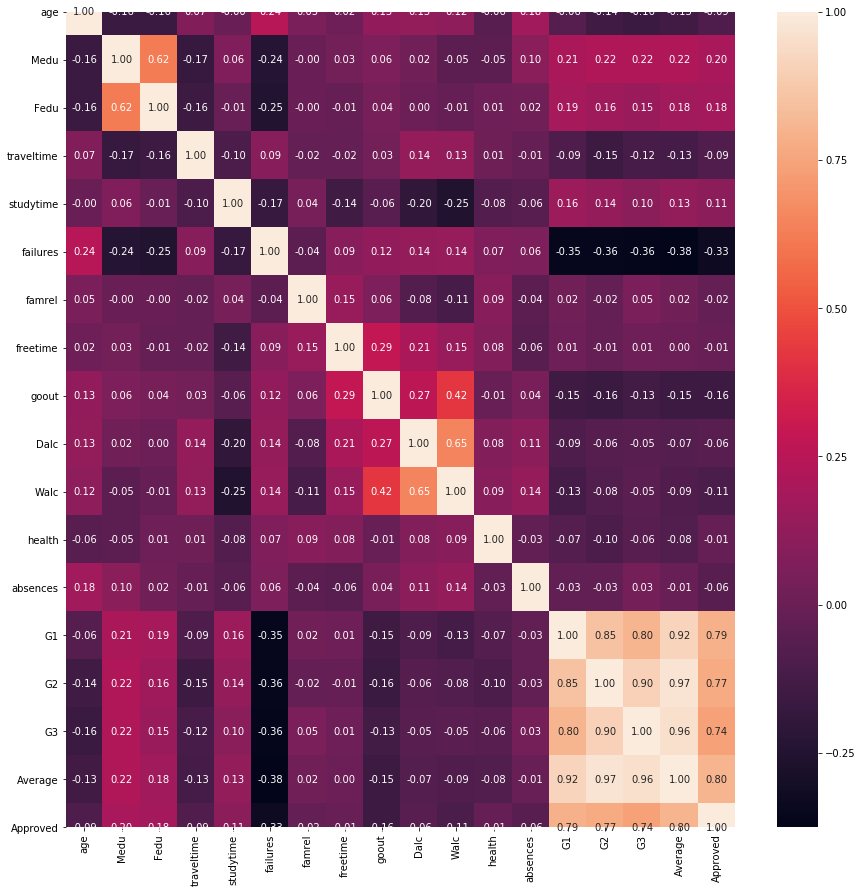

In [134]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt= ".2f", cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

<div style="text-align:center"><b>Correlation matrix</b></div>

In [135]:
corr_matrix["Dalc"].sort_values(ascending=False)

Dalc          1.000000
Walc          0.647544
goout         0.266994
freetime      0.209001
traveltime    0.138325
failures      0.136047
age           0.131125
absences      0.111908
health        0.077180
Medu          0.019834
Fedu          0.002386
G3           -0.054660
G2           -0.064120
famrel       -0.077594
G1           -0.094159
studytime    -0.196019
Name: Dalc, dtype: float64

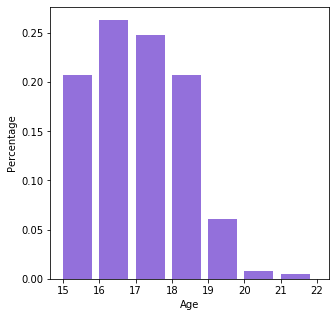

In [138]:
#Age
df.age.unique()
plt.figure(figsize=(5,5))
plt.hist(df.age,bins=7,color="mediumpurple",width=0.8,density=True)
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

In [147]:
age15=df[(df.age==15)]
age16=df[(df.age==16)]
age17=df[(df.age==17)]
age18=df[(df.age==18)]
age19=df[(df.age==19)]
age20=df[(df.age==20)]
age21=df[(df.age==21)]
female=df[df.sex=="F"]
male= df[df.sex=="M"]
GP=df[df.school=="GP"]
MS= df[df.school=="MS"]
urban=df[df.address=="U"]
rural= df[df.address=="R"]
d= {"Feature": ["All Students","Age 15","Age 16","Age 17","Age 18", "Age 19", "Age 20", "Age 21", "Female","Male","GP","MS","Urban","Rural"],
    "Count": [df.shape[0],age15.shape[0],age16.shape[0],age17.shape[0],age18.shape[0],age19.shape[0],age20.shape[0],age21.shape[0],female.shape[0],male.shape[0],GP.shape[0],MS.shape[0],urban.shape[0],rural.shape[0]],
    "Average Working Day Alcohol Consumption": [df.Dalc.mean(),age15.Dalc.mean(),age16.Dalc.mean(),age17.Dalc.mean(),age18.Dalc.mean(),age19.Dalc.mean(),age20.Dalc.mean(),age21.Dalc.mean(),female.Dalc.mean(),male.Dalc.mean(),GP.Dalc.mean(),MS.Dalc.mean(),urban.Dalc.mean(),rural.Dalc.mean()],
    "Average Weekend Alcohol Consumption": [df.Walc.mean(),age15.Walc.mean(),age16.Walc.mean(),age17.Walc.mean(),age18.Walc.mean(),age19.Walc.mean(),age20.Walc.mean(),age21.Walc.mean(),female.Walc.mean(),male.Walc.mean(),GP.Walc.mean(),MS.Walc.mean(),urban.Walc.mean(),rural.Walc.mean()]}

ds=pd.DataFrame(d)
ds

,Feature,Count,Average Working Day Alcohol Consumption,Average Weekend Alcohol Consumption
0,All Students,395,1.481013,2.291139
1,Age 15,82,1.353659,1.902439
2,Age 16,104,1.432692,2.278846
3,Age 17,98,1.520408,2.571429
4,Age 18,82,1.548780,2.414634
5,Age 19,24,1.458333,1.958333
6,Age 20,3,2.000000,2.333333
7,Age 21,1,3.000000,3.000000
8,Female,208,1.254808,1.956731
9,Male,187,1.732620,2.663102


When we consider the average alcohol consumption levels of all students, we see that all of the features we examined are very close to the average levels of alcohol consumption. In the df table above, features are shown according to their number and average working day and weekenend alcohol consumption levels(from 1 - very low to 5 - very high).

<b>Does the education and job status of parents affect their child's grade?</b>

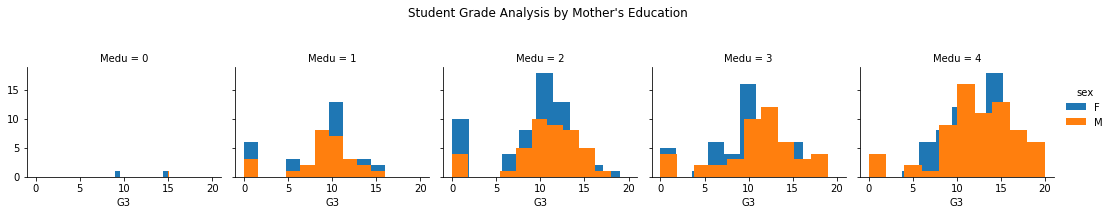

In [148]:
ax = sns.FacetGrid(df,  col = 'Medu', hue = 'sex').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Student Grade Analysis by Mother's Education")
plt.subplots_adjust(top = 0.7)
plt.show()

In [149]:
df.groupby('Medu')['G3'].mean()

Medu
0    13.000000
1     8.677966
2     9.728155
3    10.303030
4    11.763359
Name: G3, dtype: float64

* There is no direct relationship observed between the mother's education status and student's grade.
* As we could see from the graph, students of least educated mothers have also secured good grades whereas students of highly educated mothers have secured less grades.
* Considering the average grade, students of highly educated mothers have scored high.

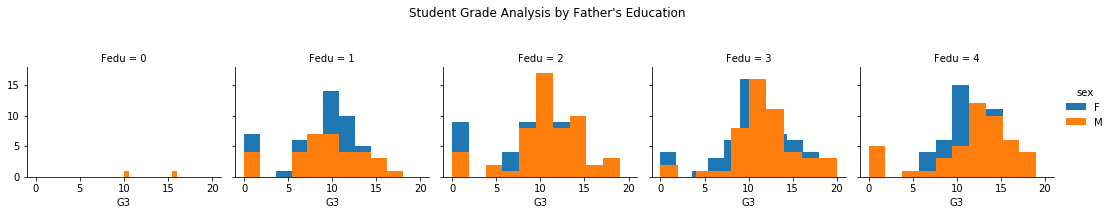

In [150]:
ax = sns.FacetGrid(df, col = 'Fedu', hue = 'sex').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Student Grade Analysis by Father's Education")
plt.subplots_adjust(top = 0.7)
plt.show()

In [151]:
df.groupby('Fedu')['G3'].mean()

Fedu
0    13.000000
1     9.158537
2    10.260870
3    10.660000
4    11.364583
Name: G3, dtype: float64

Here the trend is more or less same as that of the previous one.

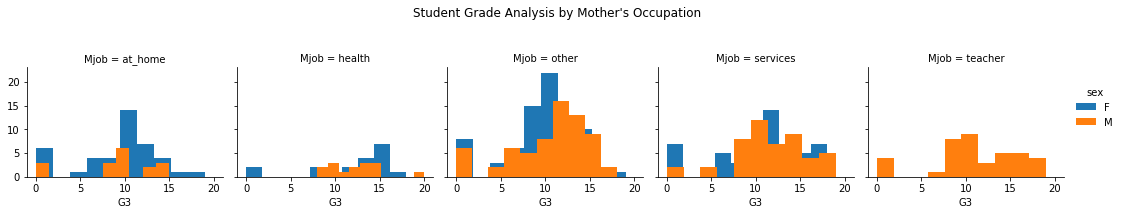

In [154]:
ax = sns.FacetGrid(df, col = 'Mjob', hue = 'sex').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Student Grade Analysis by Mother's Occupation")
plt.subplots_adjust(top = 0.7)
plt.show()

In [155]:
df.groupby('Mjob')['G3'].mean()

Mjob
at_home      9.152542
health      12.147059
other        9.822695
services    11.019417
teacher     11.051724
Name: G3, dtype: float64

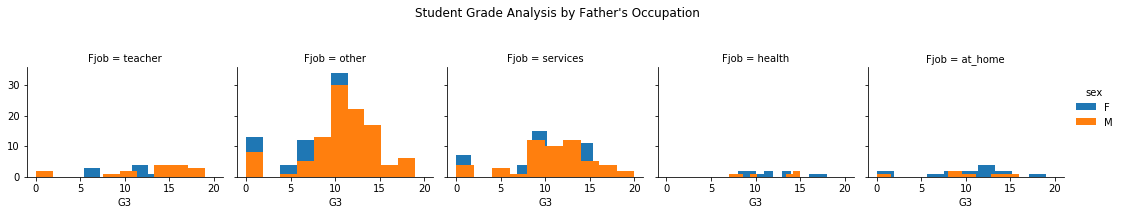

In [156]:
ax = sns.FacetGrid(df, col = 'Fjob', hue = 'sex').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Student Grade Analysis by Father's Occupation")
plt.subplots_adjust(top = 0.7)
plt.show()

In [157]:
df.groupby('Fjob')['G3'].mean()

Fjob
at_home     10.150000
health      11.611111
other       10.193548
services    10.297297
teacher     11.965517
Name: G3, dtype: float64

* As we could see from the graph, students whose parents are teachers have secured a good grade at an average.

<b>Do students who travel more tend to study less?</b>

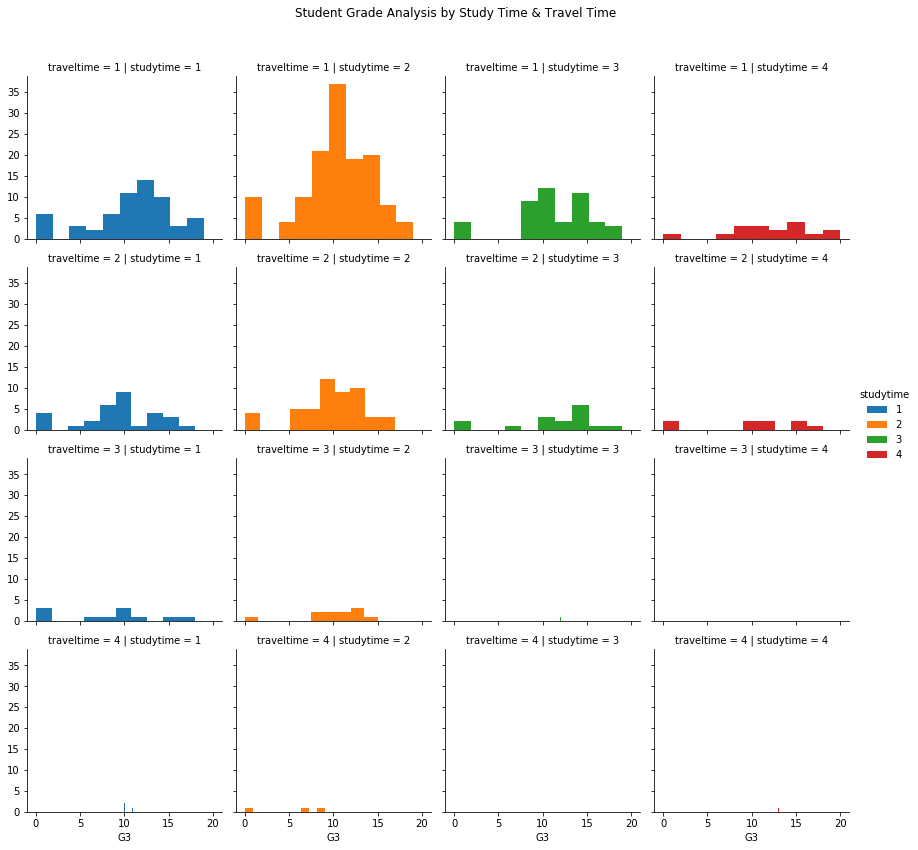

In [158]:
ax = sns.FacetGrid(df, col = 'studytime', row = 'traveltime', hue = 'studytime').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Student Grade Analysis by Study Time & Travel Time")
plt.subplots_adjust(top = 0.9)
plt.show()

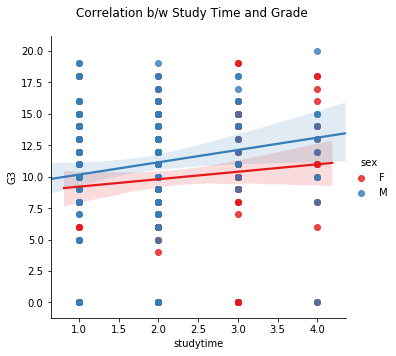

In [159]:
ax = sns.lmplot(x = 'studytime',y = 'G3', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Study Time and Grade')
plt.subplots_adjust(top = 0.9)

* Students who travel more than 2 hours is less in number.
* Students who travel for more than 2 hours are spending less time to study.
* Students who travel less than 2 hours have mixed preferences in their study pattern. There are few students who use this time to study for more hours, but most of them study for less than 2 hours.
* As expected, study time is influencing the grade. Students whose study time is more were able to secure a good grade.

<b>Do students require additional educational support to secure good grade?</b>

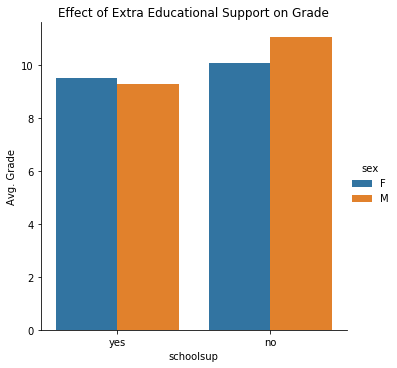

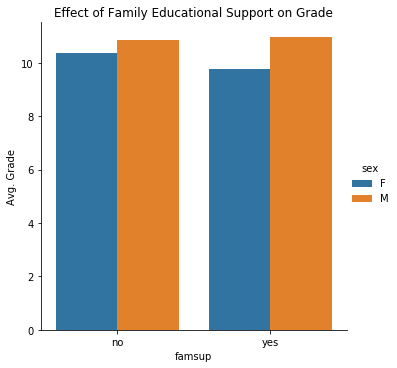

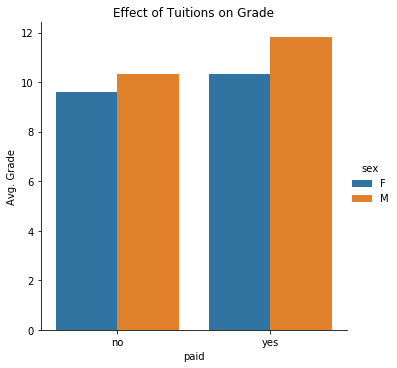

In [163]:
sns.catplot(x = 'schoolsup',y = 'G3', hue = 'sex', data = df, kind = 'bar', ci = None)
plt.title('Effect of Extra Educational Support on Grade')
plt.ylabel('Avg. Grade')
plt.show()
sns.catplot(x = 'famsup',y = 'G3', hue = 'sex', data = df, kind = 'bar', ci = None)
plt.title('Effect of Family Educational Support on Grade')
plt.ylabel('Avg. Grade')
plt.show()
sns.catplot(x = 'paid',y = 'G3', hue = 'sex', data = df, kind = 'bar', ci = None)
plt.title('Effect of Tuitions on Grade')
plt.ylabel('Avg. Grade')
plt.show()

In [164]:
Are students with internet connection scoring good grade?

Object `grade` not found.


<b>Are students with internet connection scoring good gradeM</b>

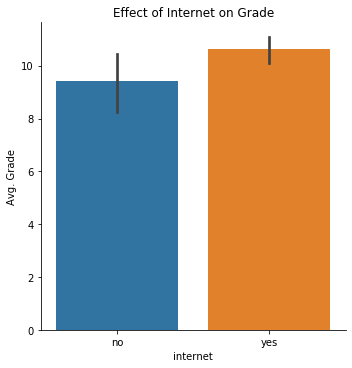

In [165]:
sns.catplot(x = 'internet', y = 'G3', kind = 'bar', data = df)
plt.title('Effect of Internet on Grade')
plt.ylabel('Avg. Grade')
plt.show()

As expected, average grade of students who have internet connection at their homes is higher than that of students who do not access internet.

<b>Is alcohol consumption influencing student's grade?</b>

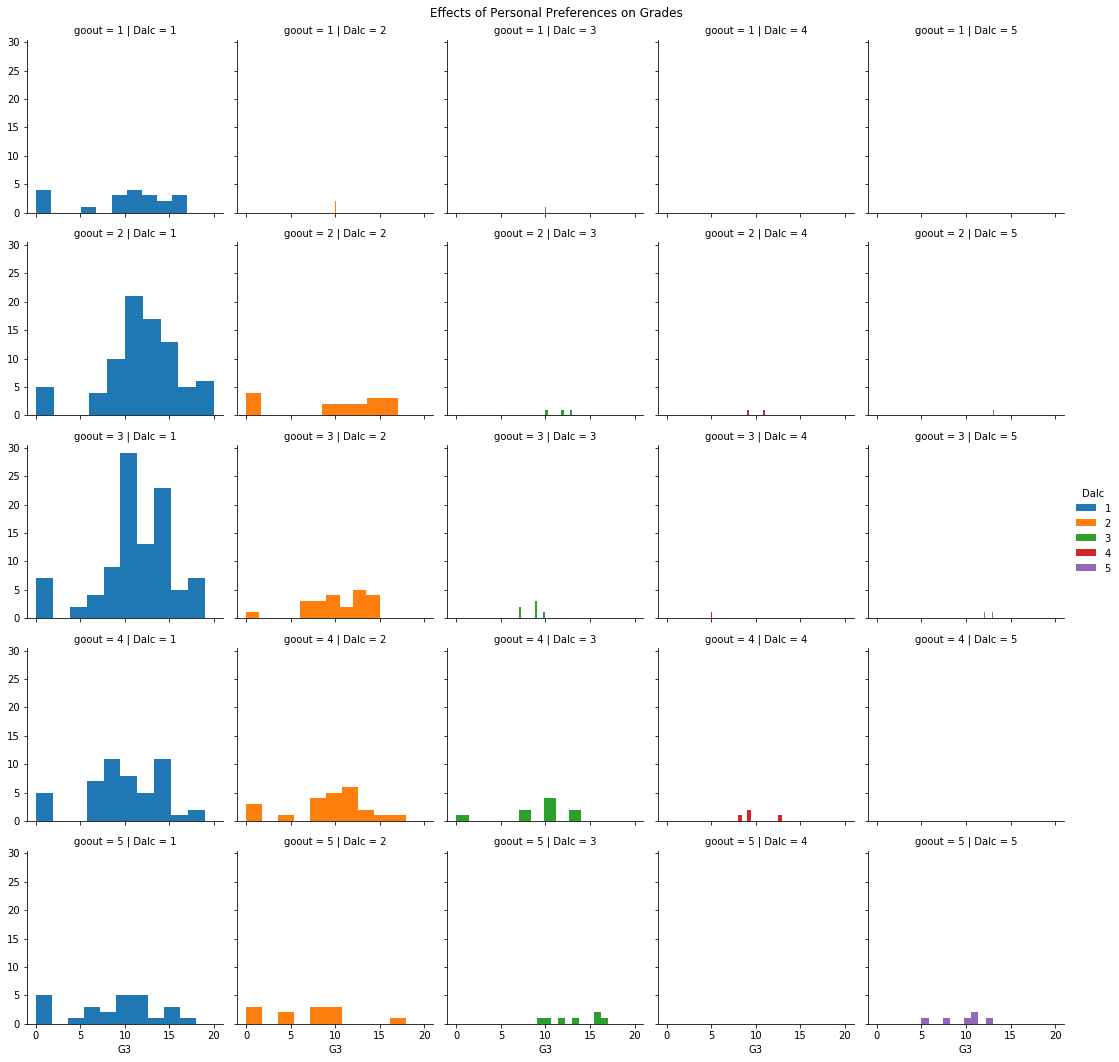

In [167]:
ax = sns.FacetGrid(df, col = 'Dalc', row = 'goout', hue = 'Dalc').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Effects of Personal Preferences on Grades")
plt.subplots_adjust(top = 0.95)
plt.show()

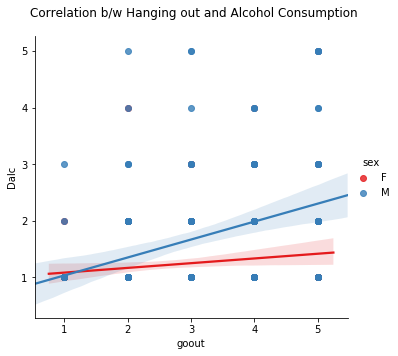

In [168]:
ax = sns.lmplot(x = 'goout',y = 'Dalc', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Hanging out and Alcohol Consumption')
plt.subplots_adjust(top = 0.9)

* Correlation between hanging out and consuming alcohol is different for each of the genders.
* Male Students who hang out more frequently consume more alcohol whereas it is not the same for female students.
* But this is not affecting their grades.

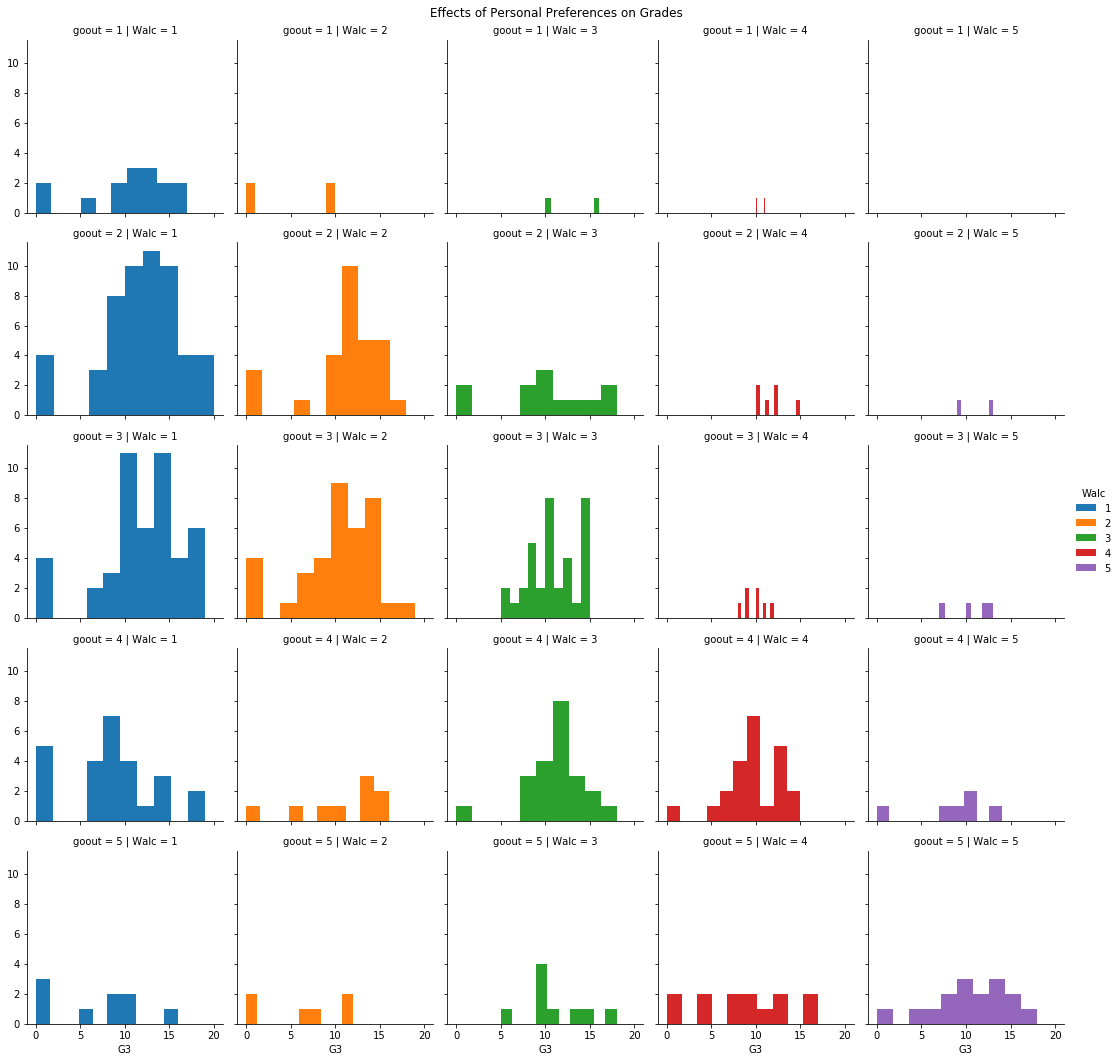

In [170]:
ax = sns.FacetGrid(df, col = 'Walc', row = 'goout', hue = 'Walc').map(plt.hist, 'G3').add_legend()
ax.fig.suptitle("Effects of Personal Preferences on Grades")
plt.subplots_adjust(top = 0.95)
plt.show()

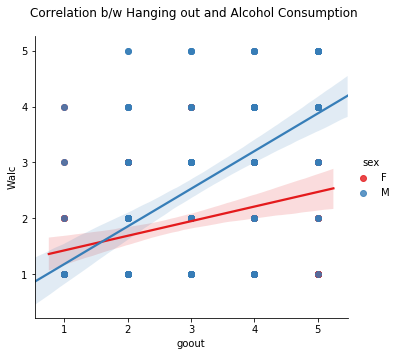

In [171]:
ax = sns.lmplot(x = 'goout',y = 'Walc', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Hanging out and Alcohol Consumption')
plt.subplots_adjust(top = 0.9)


* The alcohol consumption pattern is quite different in weekends.
* Students who go out more frequently during weekends tend to consume more alcohol.
* However it is not affecting their grades at a larger scale.

<b>Do absentees fail more?</b>

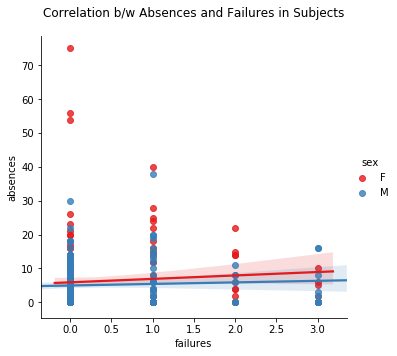

In [175]:
ax = sns.lmplot(x = 'failures',y = 'absences', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Absences and Failures in Subjects')
plt.subplots_adjust(top = 0.9)


There is no much linear correlation seen between the absenteeism and failure in exams

### Conclusion
* Some interesting insights are derived from this dataset which are summarized as below.
* As age of the students increases, the failure also raises. This may be because the adolescents tend to hang out more and involve in activities which could distract them from studies.
* Avg grade of students who have highly educated parents is higher than others.
* Students who study for more hours tend to score high.
* Failure rate impacts the student's grade.
* Students who have more free time tend to hang out much.
* Students who hang out more frequently consume alcohol in weekends. However this is not influencing their grades.
* absenteeism does not affect failures in exams much

In [60]:
object_type_features = df.select_dtypes("object").columns
object_type_features 

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# PCA

In [179]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [180]:
print(pca.explained_variance_ratio_)

[0.83089893 0.0353494 ]


In [181]:
print(X)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  
0        4     1     1       3         6  
1        3   

In [182]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

6


In [183]:
print(X2D)

[[ 3.22882653e-01 -8.98610238e-01]
 [-1.76626411e+00 -7.01369186e-01]
 [ 4.24573432e+00  3.29167171e-01]
 [-3.78340017e+00 -2.16131176e+00]
 [-1.74986087e+00 -8.89727606e-01]
 [ 4.24588714e+00 -9.95454987e-01]
 [-5.76926900e+00 -5.34560985e-01]
 [ 3.19267677e-01 -2.04813601e+00]
 [-5.77227390e+00 -2.65823002e+00]
 [-5.82003423e+00 -1.81156704e+00]
 [-5.72966229e+00 -1.59678811e+00]
 [-1.82339510e+00 -1.80411628e+00]
 [-3.72319955e+00 -1.91178051e-01]
 [-3.75877041e+00 -9.96087096e-01]
 [-5.82509773e+00 -1.55131202e+00]
 [-1.70378696e+00 -6.51038920e-01]
 [ 2.93612251e-01 -1.86900873e+00]
 [-1.77448254e+00 -1.59478662e+00]
 [ 1.03475648e+01  3.14508272e+00]
 [-1.68045400e+00 -2.75149292e-01]
 [-5.77599672e+00 -2.92089519e+00]
 [-5.78564458e+00 -1.63346350e+00]
 [-3.73572957e+00 -1.66432454e-01]
 [-5.70487946e+00  2.30975384e+00]
 [-3.81650145e+00 -1.89559523e+00]
 [ 8.28722965e+00  5.74028509e-02]
 [-3.77991834e+00 -8.66044642e-01]
 [-1.65098559e+00  3.83889130e-01]
 [-1.76765205e+00 -1

In [185]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
print(X_reduced)

[[ 0.32288265 -0.89861024 -0.63625115  1.18440883  2.10621611  0.14137951]
 [-1.76626411 -0.70136919  2.34932267 -0.40412122 -0.09803094 -1.11298081]
 [ 4.24573432  0.32916717  1.60923353 -0.70411389 -2.70685618 -0.37871647]
 ...
 [-2.56861289  3.50714803  3.68856281  0.54027022  2.4041495  -0.27533685]
 [-5.62986082  2.0903461   0.13350954 -1.17628749  0.23025468  1.77894915]
 [-0.62511146  2.2397767   2.1700664  -1.35407443  0.27772137  2.00194819]]


In [190]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4


# Classification

In [61]:
df["Average"] = (df['G1'] + df['G2'] + df['G3']) / 3
df["Approved"] = [ (1 if x > 10 else 0) for x in df["Average"] ]

In [62]:
attributes = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]

In [64]:
X = df[attributes]
Y = df["Approved"]

# train_test_split

In [208]:
from sklearn.model_selection import train_test_split    #Divide dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
print(f"rows in train set: {len(X_train)} \nrows in test set: {len(X_test)}")

rows in train set: 276 
rows in test set: 119


# Decision tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=10)
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
model.score(X,Y)

0.7518987341772152

In [68]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [194]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("Train Score LR-", model.score(X_train, Y_train)*100 , "%")
print("Test Score LR-", model.score(X_test, Y_test)*100, "%")
print("Recall score", recall_score(Y_test, Y_pred, average='macro'))
print("Precision score", precision_score(Y_test, Y_pred, average='macro')) 
print ("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Train Score LR- 77.17391304347827 %
Test Score LR- 61.34453781512605 %
Recall score 0.6050516647531573
Precision score 0.6060869565217392
Confusion Matrix:
 [[28 24]
 [22 45]]


* <b>confusion matrix - </b> is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.
* <b>recall - </b> is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
* <b>precision - </b> is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

In [178]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))

Accuracy: 0.6134453781512605


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 1)

# KNN classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
Y = df["Approved"]

In [75]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [76]:
knn.score(X,Y)

0.6911392405063291

In [195]:
knn.fit(X_test,Y_test)
Y_pred = knn.predict(X_test)
print("Train Score LR-", knn.score(X_train, Y_train)*100 , "%")
print("Test Score LR-", knn.score(X_test, Y_test)*100, "%")
print("Recall score", recall_score(Y_test, Y_pred, average='macro'))
print("Precision score", precision_score(Y_test, Y_pred, average='macro')) 
print ("Confusion matrix:\n", confusion_matrix(Y_test, Y_pred))

Train Score LR- 52.89855072463768 %
Test Score LR- 66.38655462184873 %
Recall score 0.6519804822043629
Precision score 0.6576831447290054
Confusion matrix:
 [[29 23]
 [17 50]]


In [83]:
from sklearn.metrics import accuracy_score
Y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))

Accuracy: 0.6638655462184874


# ensemble

In [94]:
# bagging method
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [95]:
estimators = []
model1=KNeighborsClassifier(n_neighbors=3)
estimators.append(('KNN', model1))

In [96]:
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

In [97]:
ensemble = VotingClassifier(estimators)

In [103]:
eclf1 = ensemble.fit(X_train,Y_train)

In [124]:
y_pred=eclf1.predict(X_test)
accuracy_score(Y_test, y_pred)

0.5546218487394958

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [126]:
abc=AdaBoostClassifier(n_estimators=50)

model = abc.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [127]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6134453781512605
